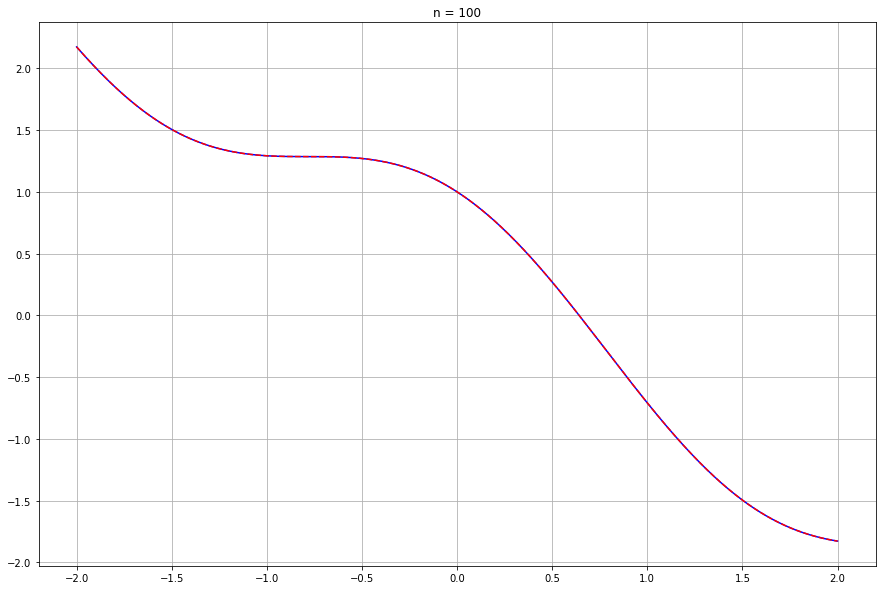

0.00010256076537640268
0.0020003318786621094


In [165]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pylab import *
from time import time

#исходная функция
func_x = np.linspace(-2.0, 2.0, 1000)
func_y = [ math.cos(x)* math.cos(x) - x for x in func_x]

def progonka(c,values,n):
    #матрица неизвестных коэффициентов
    a = [0.0 for x in range(0, n - 1)]
    b = [0.0 for x in range(0, n - 1)]
    #шаг h[i]==h[i+1], тк узлы раноотстоящие
    h = 4.0/ (n-1)

    #прямой ход метода прогонки
    for i in range(1, n - 1):
        koef_a = h
        koef_b = h
        koef_c = 2.0 * 2* h
        
        F = 6.0/ h*((values[i + 1] - values[i]) - (values[i] - values[i - 1]))
        z = (koef_a * a[i - 1] + koef_c)
        a[i] = -koef_b / z
        b[i] = (F - koef_a * b[i - 1]) / z
        
    #обратный ход мп    
    for i in range(n - 2, 0, -1):
        c[i] = a[i] * c[i+1] + b[i]


def makePoly(P,nodes,values,n):

    x_i=nodes
    a=values
    b=[0.0 for x in range(n)]
    c=[0.0 for x in range(n)]
    d=[0.0 for x in range(n)]
    
    
    c[0]=c[n-1]=0
    progonka(c,values,n)
    h=4.0/(n-1)
    for i in range(n - 1, 0, -1):
        d[i] = ((c[i] - c[i-1]) / h)
        b[i]=(values[i] - values[i - 1]) / h + c[i] * h / 2 - d[i] * h ** 2 / 6 
        
    for i in range (n):
        c[i]=c[i]/2.0
        d[i]=d[i]/6.0
        
    for i in range (n):
        P[i][0]=a[i]
        P[i][1]=b[i]
        P[i][2]=c[i]
        P[i][3]=d[i]
    

def calc_f(x, x_i, a,b,c,d):
    return a + b * (x- x_i) + c * (x- x_i)**2+ d* (x - x_i)**3

def calc_spline(x,nodes,P,n):
    
    for i in range (1,n):
        if  x<=nodes[i] and x>=nodes[i-1]:
            return calc_f(x,nodes[i],P[i][0],P[i][1],P[i][2],P[i][3])
        
    
def draw_cubic_spline(x, y, n):
    fig = plt.figure(figsize=(15,10))
    ax = plt.subplot(111)
    plt.grid(True)
    plt.title('n = {}'.format(n))
    ax.plot(func_x, func_y, 'b-', label='function')
    ax.plot(x, y, 'r--', label='cubic spline')
    plt.show()
    
def find_max(y):
    max_n= 0
    for i in range(1000):
        max_n = max(max_n, abs(func_y[i] - y[i]))
    print(max_n)
    
n=100
# получаем узлы
nodes = np.linspace(-2.0, 2.0, n+1)
values = [ math.cos(x)* math.cos(x) - x for x in nodes]


#матрица с коэффициентами полинома
P=[[0.0 for x in range(4)] for x in range(n+1)]

time1=time()
makePoly(P,nodes,values,n+1)
time2=time()


x=func_x
y=[calc_spline(x,nodes,P,n+1) for x in x]


draw_cubic_spline(x, y,n)

time3=time()
find_max(y)
time4=time()

print(time4-time3+time2-time1)